In [19]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd
from models.scripts.utils import load_csv, split_date

In [20]:
file_path = 'data/xmr_lunarcrush_timeseries.csv'

df = load_csv(file_path)

In [21]:
df.head(10)

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_volume_24h_rank,social_score_24h_rank,social_contributors,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,daily_price_change,week
0,13,1567036800,2019-08-29,72.37,67.28,72.46,67.13,1741238.0,68778555.58,1.157065e+09,...,17.0,9.0,22.0,1041,7988.0,0.275413,2.332637e+11,0.421833,-5.09,35
1,13,1567123200,2019-08-30,66.69,68.75,70.00,66.17,1741238.0,68778555.58,1.166732e+09,...,17.0,9.0,22.0,1018,7988.0,0.275413,2.332637e+11,0.421833,2.06,35
2,13,1567209600,2019-08-31,68.65,68.07,69.95,66.76,1741238.0,68778555.58,1.160993e+09,...,17.0,9.0,22.0,812,7988.0,0.275413,2.332637e+11,0.421833,-0.58,35
3,13,1567296000,2019-09-01,68.13,71.88,74.82,67.49,1741238.0,68778555.58,1.235596e+09,...,17.0,9.0,22.0,864,7988.0,0.275413,2.332637e+11,0.421833,3.75,35
4,13,1567382400,2019-09-02,72.05,73.63,74.42,70.20,1741238.0,68778555.58,1.260071e+09,...,17.0,9.0,22.0,1172,7988.0,0.275413,2.332637e+11,0.421833,1.58,36
5,13,1567468800,2019-09-03,74.05,75.06,75.65,73.18,1741238.0,68778555.58,1.292582e+09,...,17.0,9.0,22.0,1057,7988.0,0.275413,2.332637e+11,0.421833,1.01,36
6,13,1567555200,2019-09-04,75.00,74.15,75.03,71.93,1741238.0,68778555.58,1.267841e+09,...,17.0,9.0,22.0,1016,7988.0,0.275413,2.332637e+11,0.421833,-0.85,36
7,13,1567641600,2019-09-05,73.95,76.10,76.52,73.91,1741238.0,68778555.58,1.304128e+09,...,17.0,9.0,22.0,1168,7988.0,0.275413,2.332637e+11,0.421833,2.15,36
8,13,1567728000,2019-09-06,75.81,75.41,80.06,75.14,1741238.0,68778555.58,1.299687e+09,...,17.0,9.0,22.0,1133,7988.0,0.275413,2.332637e+11,0.421833,-0.40,36
9,13,1567814400,2019-09-07,74.88,78.53,78.91,74.15,1741238.0,68778555.58,1.348805e+09,...,17.0,9.0,22.0,906,7988.0,0.275413,2.332637e+11,0.421833,3.65,36


### Visual Stationarity

In [22]:
half = int(len(df) / 2)
first_half = df['close'].iloc[:half]
second_half = df['close'].iloc[half:]

# Calculate rolling statistics
window_size = 12 
first_half_rolling_mean = first_half.rolling(window=window_size).mean()
first_half_rolling_std = first_half.rolling(window=window_size).std()

second_half_rolling_mean = second_half.rolling(window=window_size).mean()
second_half_rolling_std = second_half.rolling(window=window_size).std()

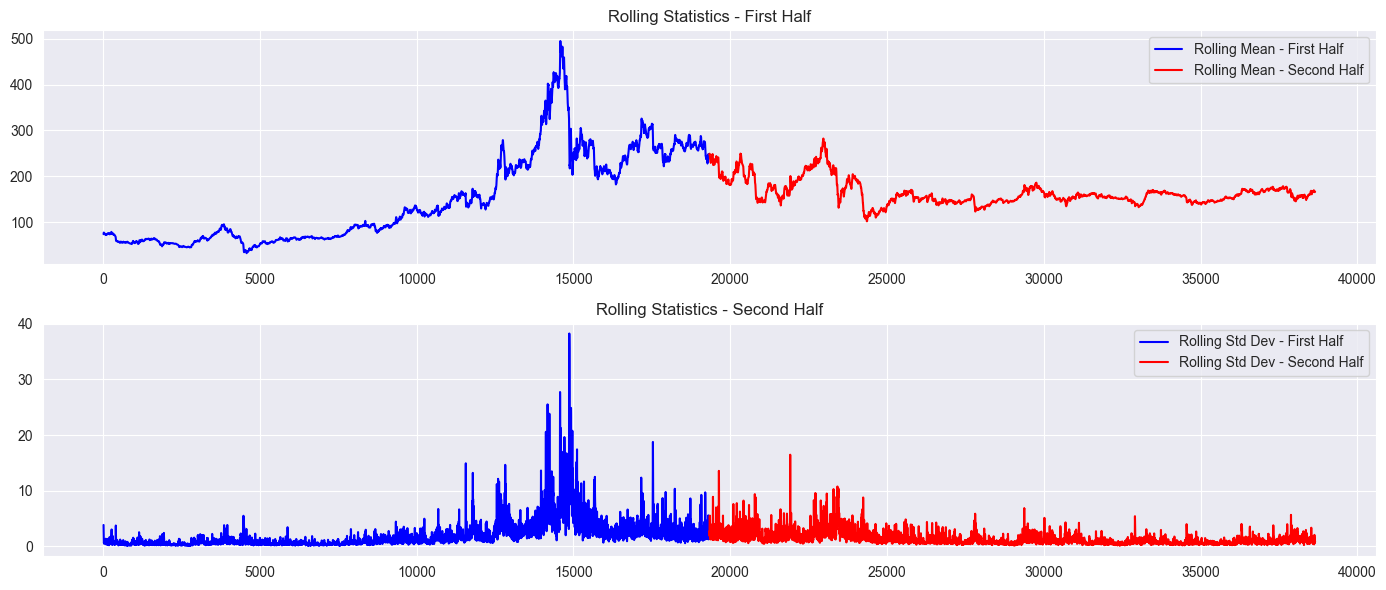

In [23]:
import matplotlib.pyplot as plt

# Plot Rolling Statistics for the First Half
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(first_half_rolling_mean, label='Rolling Mean - First Half', color='blue')
plt.plot(second_half_rolling_mean, label='Rolling Mean - Second Half', color='red')
plt.title('Rolling Statistics - First Half')
plt.legend()

# Plot Rolling Statistics for the Second Half
plt.subplot(2, 1, 2)
plt.plot(first_half_rolling_std, label='Rolling Std Dev - First Half', color='blue')
plt.plot(second_half_rolling_std, label='Rolling Std Dev - Second Half', color='red')
plt.title('Rolling Statistics - Second Half')
plt.legend()

plt.tight_layout()
plt.show()

### Statistical Stationarity

In [24]:
close_prices = df['close']
close_prices

0         67.280000
1         68.750000
2         68.070000
3         71.880000
4         73.630000
            ...    
38651    166.509621
38652    166.895601
38653    167.402576
38654    166.809223
38655    165.906917
Name: close, Length: 38656, dtype: float64

In [25]:
result = adfuller(close_prices.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.219344
p-value: 0.199300
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [26]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(close_prices)

KPSS Statistic: 7.91279954990115
p-value: 0.01
Num Lags: 116
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/var/folders/4x/xdz4xz_d7c59926x0c2wps4m0000gn/T/ipykernel_23970/3698218819.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [27]:
df["close_diff"] = df["close"].diff()

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit a linear model
X = np.arange(len(df)).reshape(-1, 1)
y = df["close"].values
model = LinearRegression()
model.fit(X, y)

# Calculate the trend
trend = model.predict(X)

# Detrend the series
df["close_detrend"] = y - trend

In [29]:
df["close_log"] = np.log(df["close"])

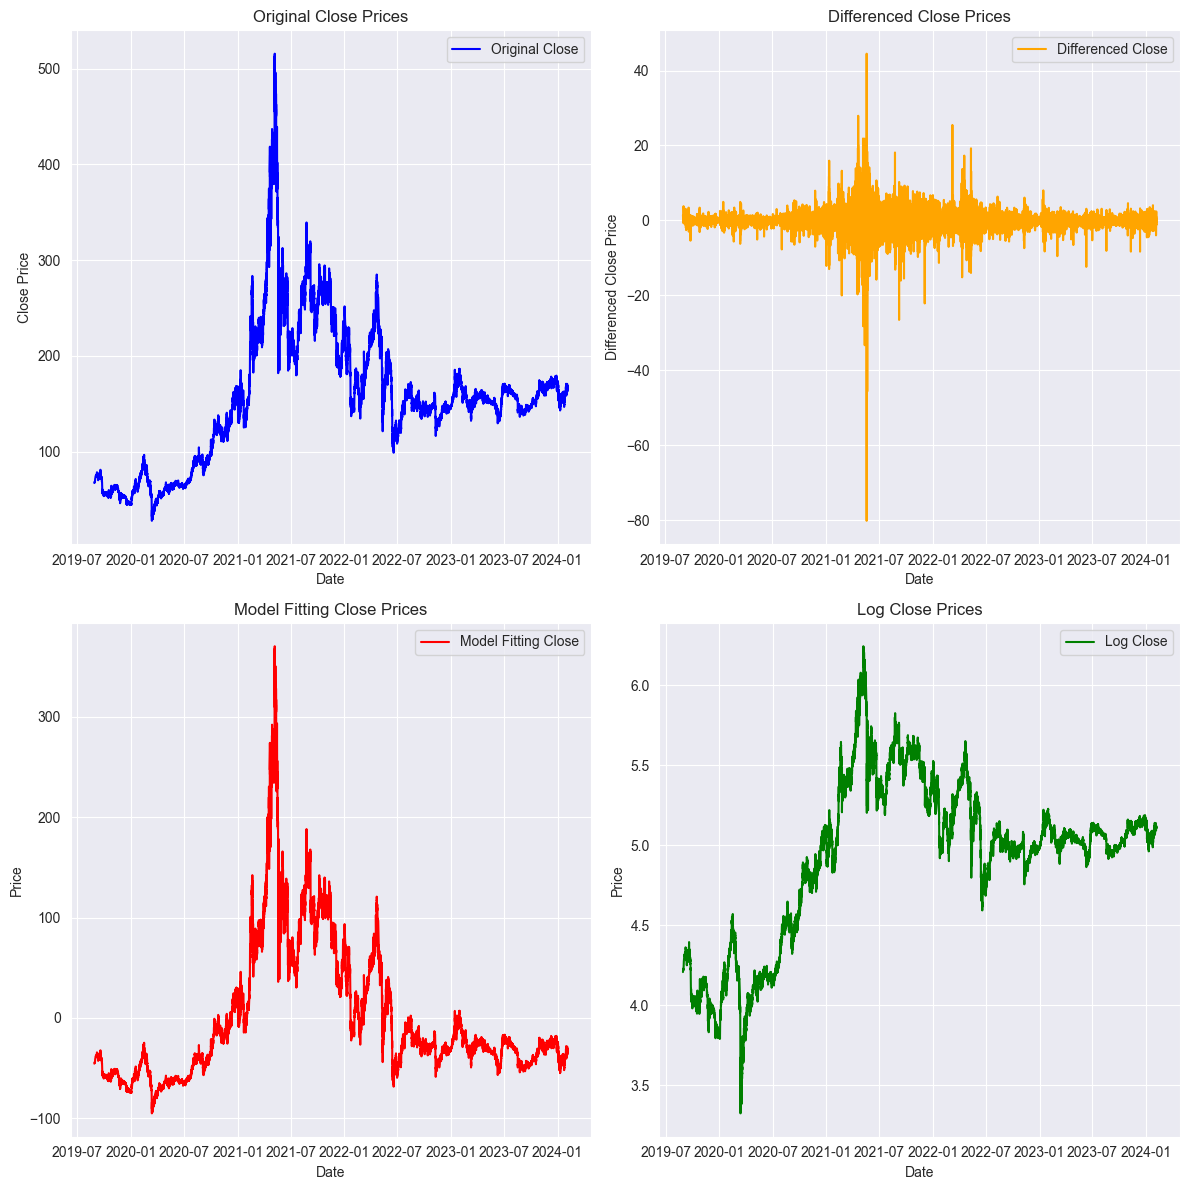

In [30]:
import matplotlib.pyplot as plt

# Plot the original 'Close' prices
plt.figure(figsize=(12, 12))  # Adjusted for larger size
plt.subplot(2, 2, 1)  # Two rows, two columns, first plot
plt.plot(df['time'], df['close'], label='Original Close', color='blue')
plt.title('Original Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot the differenced 'Close' prices
plt.subplot(2, 2, 2)  # Two rows, two columns, second plot
plt.plot(df['time'], df['close_diff'], label='Differenced Close', color='orange')
plt.title('Differenced Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()

# Plot the 'Model Fitting Close' prices (assuming this column exists in df)
plt.subplot(2, 2, 3)  # Two rows, two columns, third plot
plt.plot(df['time'], df['close_detrend'], label='Model Fitting Close', color='red')
plt.title('Model Fitting Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the 'Log Close' prices (assuming this column exists in df)
plt.subplot(2, 2, 4)  # Two rows, two columns, fourth plot
plt.plot(df['time'], df['close_log'], label='Log Close', color='green')
plt.title('Log Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()  # Adjusts the plots to fit visually better
plt.show()

In [31]:
def ADF_check(column):
    close_prices = df[column]
    result = adfuller(close_prices.dropna())  # Drop NA values if present
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [32]:
df['close_diff'].dropna(inplace=True)
ADF_check('close_diff')

ADF Statistic: -29.660355
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [33]:
ADF_check('close_log')

ADF Statistic: -1.799573
p-value: 0.380673
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [34]:
ADF_check('close_detrend')

ADF Statistic: -2.206953
p-value: 0.203732
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
